# Exploration of StackOverflow dataset

Meyi Duleme, OpenClassrooms/Centrale Supélec


In [1]:
import pandas as pd
from functions import *
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from ast import literal_eval
import pandas as pd
import numpy as np

import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import itertools

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dulem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dulem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dulem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from sklearn.model_selection import train_test_split

## Loading and formatting data

In [3]:
raw_data = pd.read_csv('C:/Users/dulem/NLP_Stackoverflow/QueryResults(1).csv')
raw_data.head()

,Id,Title,Body,Tags,ViewCount,FavoriteCount
0,7284,What is Turing Complete?,"<p>What does the expression ""Turing Complete"" ...",<theory><turing-machines><turing-complete>,210026,184
1,7477,How to autosize a textarea using Prototype?,<p>I'm currently working on an internal sales ...,<javascript><html><css><textarea><prototypejs>,146459,67
2,7492,Performing a Stress Test on Web Application?,"<p>In the past, I used Microsoft Web Applicati...",<web-applications><stress-testing><performance...,161018,174
3,7551,Best Practices for securing a REST API / web s...,<p>When designing a REST API or service are th...,<wcf><security><rest><authorization><rest-secu...,311974,683
4,7622,"Are the shift operators (<<, >>) arithmetic or...","<p>In C, are the shift operators (<code>&lt;&l...",<c><binary><bit-manipulation><bit-shift>,257747,61


In [4]:
raw_data['Body_text'] = raw_data['Body'].apply(lambda body : BeautifulSoup(body, 'lxml').text)

In [5]:
raw_data.head()

,Id,Title,Body,Tags,ViewCount,FavoriteCount,Body_text
0,7284,What is Turing Complete?,"<p>What does the expression ""Turing Complete"" ...",<theory><turing-machines><turing-complete>,210026,184,"What does the expression ""Turing Complete"" mea..."
1,7477,How to autosize a textarea using Prototype?,<p>I'm currently working on an internal sales ...,<javascript><html><css><textarea><prototypejs>,146459,67,I'm currently working on an internal sales app...
2,7492,Performing a Stress Test on Web Application?,"<p>In the past, I used Microsoft Web Applicati...",<web-applications><stress-testing><performance...,161018,174,"In the past, I used Microsoft Web Application ..."
3,7551,Best Practices for securing a REST API / web s...,<p>When designing a REST API or service are th...,<wcf><security><rest><authorization><rest-secu...,311974,683,When designing a REST API or service are there...
4,7622,"Are the shift operators (<<, >>) arithmetic or...","<p>In C, are the shift operators (<code>&lt;&l...",<c><binary><bit-manipulation><bit-shift>,257747,61,"In C, are the shift operators (<<, >>) arithme..."


In [6]:
raw_data['Tags'] = raw_data['Tags'].str.replace('><','|')
raw_data['Tags'] = raw_data['Tags'].str.replace('<','')
raw_data['Tags'] = raw_data['Tags'].str.replace('>','')
raw_data['Tags'] = raw_data['Tags'].str.split('|')
raw_data.head()

,Id,Title,Body,Tags,ViewCount,FavoriteCount,Body_text
0,7284,What is Turing Complete?,"<p>What does the expression ""Turing Complete"" ...","[theory, turing-machines, turing-complete]",210026,184,"What does the expression ""Turing Complete"" mea..."
1,7477,How to autosize a textarea using Prototype?,<p>I'm currently working on an internal sales ...,"[javascript, html, css, textarea, prototypejs]",146459,67,I'm currently working on an internal sales app...
2,7492,Performing a Stress Test on Web Application?,"<p>In the past, I used Microsoft Web Applicati...","[web-applications, stress-testing, performance...",161018,174,"In the past, I used Microsoft Web Application ..."
3,7551,Best Practices for securing a REST API / web s...,<p>When designing a REST API or service are th...,"[wcf, security, rest, authorization, rest-secu...",311974,683,When designing a REST API or service are there...
4,7622,"Are the shift operators (<<, >>) arithmetic or...","<p>In C, are the shift operators (<code>&lt;&l...","[c, binary, bit-manipulation, bit-shift]",257747,61,"In C, are the shift operators (<<, >>) arithme..."


## Selecting Tags

In [7]:
raw_data['Tags'].explode().value_counts()[:50]

javascript           2565
python               2524
java                 2017
android              1627
git                  1268
c#                   1262
c++                  1050
html                  986
ios                   939
css                   789
jquery                786
php                   659
.net                  603
c                     567
sql                   532
node.js               529
objective-c           510
mysql                 509
string                508
bash                  477
linux                 468
iphone                425
arrays                388
algorithm             325
sql-server            320
r                     314
shell                 311
performance           301
json                  293
angularjs             290
macos                 283
database              281
windows               276
swift                 272
ruby                  252
pandas                241
ruby-on-rails         237
multithreading        235
github      

In [8]:
top_50_tags = ['javascript', 'python', 'java', 'android', 'git', 'c#', 'c++', 'html', 'ios',
 'css', 'jquery', 'php', '.net', 'c', 'sql', 'node.js', 'objective-c', 'string', 
 'mysql', 'bash', 'linux', 'iphone', 'arrays', 'algorithm', 'sql-server', 'r', 
 'shell', 'performance', 'json', 'angularjs', 'macos', 'database', 'windows',
 'swift', 'ruby', 'pandas', 'ruby-on-rails', 'multithreading', 'github', 'regex',
 'django', 'xcode', 'oop', 'list', 'cocoa-touch', 'asp.net', 'asp.net-mvc', 
 'unix', 'language-agnostic', 'vim']
print(top_50_tags)

['javascript', 'python', 'java', 'android', 'git', 'c#', 'c++', 'html', 'ios', 'css', 'jquery', 'php', '.net', 'c', 'sql', 'node.js', 'objective-c', 'string', 'mysql', 'bash', 'linux', 'iphone', 'arrays', 'algorithm', 'sql-server', 'r', 'shell', 'performance', 'json', 'angularjs', 'macos', 'database', 'windows', 'swift', 'ruby', 'pandas', 'ruby-on-rails', 'multithreading', 'github', 'regex', 'django', 'xcode', 'oop', 'list', 'cocoa-touch', 'asp.net', 'asp.net-mvc', 'unix', 'language-agnostic', 'vim']


In [9]:
tuple(raw_data['Tags'][0])

('theory', 'turing-machines', 'turing-complete')

In [10]:
data = raw_data.copy()
for row in range(len(data['Tags'])):
    data['Tags'][row] = tuple(data['Tags'][row])
data.head()

<ipython-input-10-5d766e0598ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tags'][row] = tuple(data['Tags'][row])


,Id,Title,Body,Tags,ViewCount,FavoriteCount,Body_text
0,7284,What is Turing Complete?,"<p>What does the expression ""Turing Complete"" ...","(theory, turing-machines, turing-complete)",210026,184,"What does the expression ""Turing Complete"" mea..."
1,7477,How to autosize a textarea using Prototype?,<p>I'm currently working on an internal sales ...,"(javascript, html, css, textarea, prototypejs)",146459,67,I'm currently working on an internal sales app...
2,7492,Performing a Stress Test on Web Application?,"<p>In the past, I used Microsoft Web Applicati...","(web-applications, stress-testing, performance...",161018,174,"In the past, I used Microsoft Web Application ..."
3,7551,Best Practices for securing a REST API / web s...,<p>When designing a REST API or service are th...,"(wcf, security, rest, authorization, rest-secu...",311974,683,When designing a REST API or service are there...
4,7622,"Are the shift operators (<<, >>) arithmetic or...","<p>In C, are the shift operators (<code>&lt;&l...","(c, binary, bit-manipulation, bit-shift)",257747,61,"In C, are the shift operators (<<, >>) arithme..."


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['Tags'])
classes = list(mlb.classes_)
index_50 = [classes.index(tag) for tag in top_50_tags]

In [12]:
sum(y[:, index_50[0]])

2565

In [13]:
loc  = 0 
for index in index_50:
    data[top_50_tags[loc]] = y[:, index]
    loc += 1 

In [14]:
sum(data.javascript)

2565

In [15]:
#data = raw_data.drop(columns = 'Tags')
#for tag in top_50_tags:
 #   data[tag] = int(tag in raw_data['Tags'])
#data.head()

## Univariate analysis

In [16]:
data.loc[:,'length_of_question'] = data.loc[:,'Body_text'].apply(len)

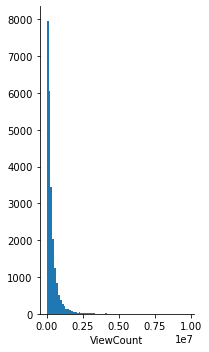

In [17]:
grid = sns.FacetGrid(data, height = 5, aspect = 0.6)
grid.map(plt.hist, 'ViewCount', bins = 75)

## Bivariate analysis

In [18]:
data['language'] = raw_data['Tags'].apply(return_lang)

In [19]:
# Find rows that contain only a single tag
plot_df = data[(data['language'].apply(len) > 0) & (data['language'].apply(len) < 2)] 

# In order to properly work with these labels, we must convert them from lists into strings.
plot_df.loc[:,'language'] = plot_df.loc[:,'language'].apply(lst_to_str)


C:\Users\dulem\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


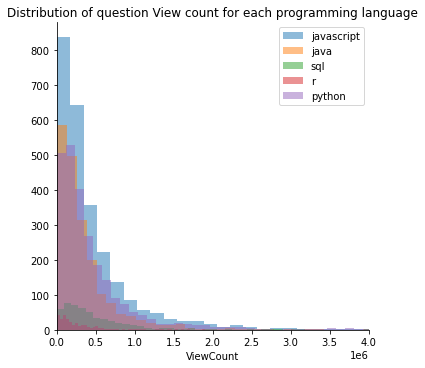

In [20]:
grid = sns.FacetGrid(plot_df, hue = 'language', height = 5)
grid.map(plt.hist, 'ViewCount', bins = 50, alpha = 0.5)
axes = grid.axes

axes[0,0].set_title('Distribution of question View count for each programming language')
axes[0,0].set_xlim([0,4000000])
axes[0,0].legend()

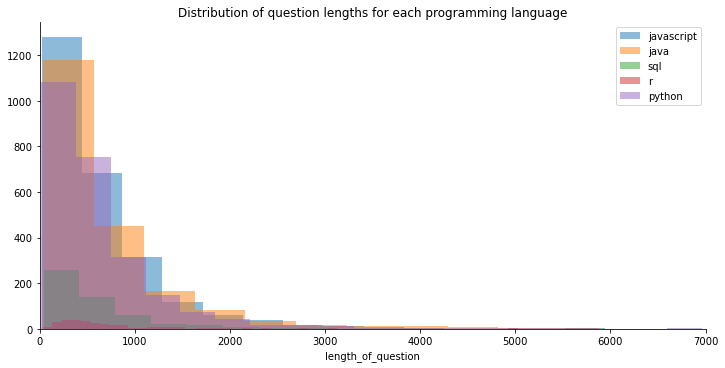

In [21]:
grid = sns.FacetGrid(plot_df, hue = 'language', height = 5, aspect = 2)
grid.map(plt.hist, 'length_of_question', bins = 50, alpha = 0.5)
axes = grid.axes

axes[0,0].set_title('Distribution of question lengths for each programming language')
axes[0,0].set_xlim([0,7000])
axes[0,0].legend()


## Train and test set

In [22]:
#shuffled = df.sample(frac=1)
#result = np.array_split(shuffled, 5)  

## Preprocessing for NLP (I) : text cleaning

In [23]:
Body_text_modified = list()
all_words = list()
tokens = list()
index = 0

for x in data['Body_text'].values:
    text, filtered_sentence = text_prepare(data['Body_text'][index])
    Body_text_modified.append(text)
    all_words.extend(filtered_sentence)
    tokens.append(filtered_sentence)
    index += 1

data['Body_text_modified'] = Body_text_modified
data['Body_text_modified'].head()

0    expression `` turing complete '' mean ?give si...
1    'm currently working internal sales applicatio...
2    past , used microsoft web application stress t...
3    designing rest api service established best pr...
4    c , shift operators ( < < , > > ) arithmetic l...
Name: Body_text_modified, dtype: object

In [24]:
data['Body_text_modified'].shape

(23739,)

In [25]:
import pickle
open_file = open("tokens.pkl", "wb")
pickle.dump(tokens, open_file)
open_file.close()

## WordCloud

(-0.5, 399.5, 199.5, -0.5)

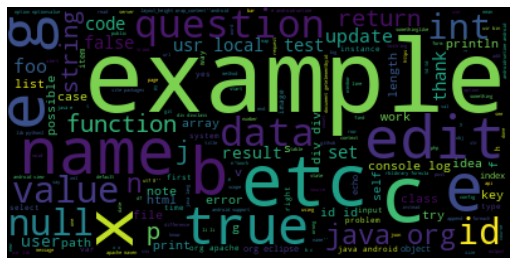

In [26]:

# Instantiate a new wordcloud.
wordcloud = WordCloud()
# Apply the wordcloud to the text.
X_merged = data['Body_text_modified'].values.tolist() 
wordcloud.generate(''.join(all_words))

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

## Preprocessing for NLP (II) : Bag of words, TF-IDF 

In [27]:
X_train, X_test, y_train, y_test= train_test_split(data['Body_text_modified'], data[top_50_tags], test_size=0.3)

In [28]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [29]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
data_features_train = vectorizer.fit_transform(X_train)
data_features_test = vectorizer.transform(X_test)

# Numpy arrays are easy to work with, so convert the result to an
# array
X_bagofwords_train = data_features_train #np.asarray(data_features_train)
X_bagofwords_test = data_features_test #np.asarray(data_features_test)

In [30]:
bow_vocab = vectorizer.get_feature_names()

In [31]:
print('X_bagogwords_train size :', X_bagofwords_train.shape) 

X_bagogwords_train size : (16617, 5000)


In [32]:
type(X_bagofwords_train.toarray())

numpy.ndarray

In [33]:
print(bow_vocab)

['00', '000', '0000', '000000', '00000000', '01', '02', '03', '04', '05', '054', '06', '069', '07', '08', '09', '0dp', '0f', '0px', '0x', '10', '100', '1000', '10000', '100px', '101', '102', '1024', '103', '1034', '104', '10px', '11', '110', '111', '12', '120', '123', '1234', '125', '127', '128', '13', '130', '14', '147', '15', '150', '153', '16', '160', '168', '17', '172', '1743', '18', '180', '1803', '18850', '19', '192', '1l', '1px', '1st', '20', '200', '2000', '2001', '2002', '2003', '2005', '2006', '2007', '2008', '2009', '200px', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '207', '20px', '21', '22', '23', '234', '239', '24', '25', '250', '255', '256', '26', '27', '28', '29', '2d', '2f', '2l', '2nd', '2x', '30', '300', '3000', '300px', '301', '30280', '30319', '304', '307', '30px', '31', '32', '320', '321', '33', '330', '34', '35', '36', '37', '38', '3896', '39', '3d', '3l', '3rd', '40', '400', '4000', '4008', '401', '404', '41', '42', '43', '44', '443', '45', 

In [34]:
vectorizer_1 = TfidfVectorizer(sublinear_tf=True, min_df=0.0002,
                                 stop_words='english')
X_tfidf_train = vectorizer_1.fit_transform(X_train)
X_tfidf_test = vectorizer_1.transform(X_test)

In [35]:
import joblib
joblib.dump(vectorizer_1, 'vectorizer.joblib') 

['vectorizer.joblib']

In [37]:
tfidf_vocab = vectorizer_1.get_feature_names()

In [38]:
print('X_tfidf size :', X_tfidf_train.shape) 

X_tfidf size : (16617, 10774)


In [39]:
print(tfidf_vocab)
print(np.shape(tfidf_vocab))

['00', '000', '0000', '000000', '00000000', '0001', '001', '002', '003', '004', '005', '006', '009', '01', '010', '0100', '013', '015', '02', '021', '022', '03', '03d', '04', '0400', '05', '0500', '06', '07', '08', '0800', '09', '0_21', '0_45', '0dp', '0f', '0px', '0s', '0x', '0x0', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '1000px', '1001', '100644', '100k', '100px', '101', '102', '1022', '1024', '103', '104', '1045', '1048576', '105', '106', '107', '108', '1080', '109', '10dip', '10dp', '10k', '10m', '10mb', '10px', '10x', '11', '110', '111', '11111111', '112', '113', '114', '115', '116', '117', '118', '119', '11g', '12', '120', '1200', '120px', '121', '122', '123', '1234', '12345', '123456', '1234567890', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '139', '14', '140', '1400', '140px', '141', '142', '143', '144', '145', '147', '148', '149', '15', '150', '1500', '150px', '151', '152', '153', '154', '155',

## Saving transformed data

In [41]:
import pickle

In [42]:
a_file = open("tfidf_vocab.pkl", "wb")
pickle.dump(tfidf_vocab, a_file)
a_file.close()

In [43]:
b_file = open("bow_vocab.pkl", "wb")
pickle.dump(bow_vocab, b_file)
a_file.close()

In [44]:
open_file = open("X_bagofwords_train.pkl", "wb")
pickle.dump(X_bagofwords_train.toarray(), open_file)
open_file.close()

In [45]:
open_file = open("X_bagofwords_test.pkl", "wb")
pickle.dump(X_bagofwords_test.toarray(), open_file)
open_file.close()

In [47]:
open_file = open("X_tfidf_train.pkl", "wb")
pickle.dump(X_tfidf_train.toarray(), open_file)
open_file.close()

In [48]:
open_file = open("X_tfidf_test.pkl", "wb")
pickle.dump(X_tfidf_test.toarray(), open_file)
open_file.close()

In [49]:
open_file = open("y_train.pkl", "wb")
pickle.dump(np.array(y_train), open_file)
open_file.close()

In [50]:
open_file = open("y_test.pkl", "wb")
pickle.dump(np.array(y_test), open_file)
open_file.close()

In [51]:
open_file = open("top_50_tags.pkl", "wb")
pickle.dump(top_50_tags, open_file)
open_file.close()

Pistes: stemming, laisser ponctuation word2vec  for word embedding, use spacy package, identify regex  specific to the field and use re to extract them